In [2]:
from pyzbar import pyzbar
import cv2

In [3]:
hex_pic_path = "../imgs/WholeDrone2.jpg"
img = cv2.imread(hex_pic_path) 
qr = cv2.imread("../imgs/qr_code.png")

In [4]:
pyzbar.decode(img)

[]

In [5]:
pyzbar.decode(qr)

[Decoded(data=b'https://qrco.de/bbgwtY', type='QRCODE', rect=Rect(left=36, top=41, width=505, height=505), polygon=[Point(x=36, y=41), Point(x=36, y=546), Point(x=541, y=546), Point(x=541, y=42)])]

In [6]:
qr.shape, img.shape

((589, 579, 3), (4032, 3024, 3))

In [7]:

small_qr = cv2.resize(qr, (300, 300))

In [8]:
import numpy as np
from scipy import ndimage
def insert_rand(img, qr):
    img = img.copy()
    qr = qr.copy()
    
    rot = np.random.randint(-180, 180)
    
    qr = ndimage.rotate(qr, rot).astype(img.dtype)
    qr_h, qr_w, _ = qr.shape
    h, w, _ = img.shape 
    
    y = np.random.randint(0, h - qr_h) 
    x = np.random.randint(0, w - qr_w)
    
    for i in range(x, x + qr_w):
        for j in range(y, y + qr_h):
            if qr[j - y, i - x, :].sum() > 0:
                img[j, i, :] = qr[j - y, i - x, :]
#     img[x:x + qr_w, y:y+qr_h, :] = qr
    
    
    return img, {
        "x": x,
        "y": y,
        "width": qr_w,
        "height": qr_h,
        "rot": rot,  
    }
    

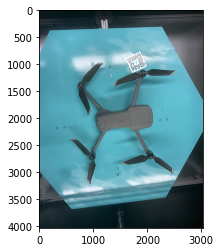

In [9]:
import matplotlib.pyplot as plt
plt.imshow(insert_rand(img, small_qr)[0])
plt.show()

In [10]:
pyzbar.decode(img)

[]

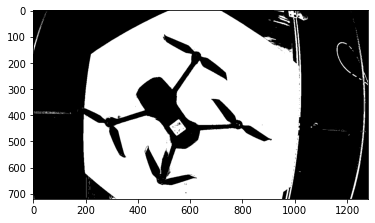

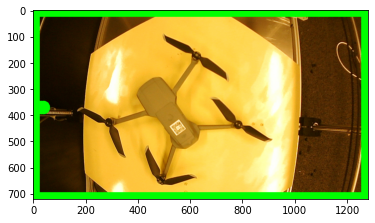

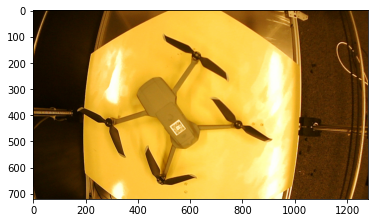

In [11]:
oi = "../imgs/above_imgs/2020-09-12_1923.jpg"
img_gray = cv2.imread(oi, cv2.IMREAD_GRAYSCALE) 
img = cv2.imread(oi) 

img2 = cv2.imread(oi) 
import matplotlib.pyplot as plt 
# Converting image to a binary image  
# (black and white only image). 
_,threshold = cv2.threshold(img_gray, 150, 255,  
                            cv2.THRESH_BINARY) 
plt.imshow(threshold, cmap ="gray")
plt.show()
   
# Detecting shapes in image by selecting region  
# with same colors or intensity. 
# contours,_=cv2.findContours(threshold, cv2.RETR_TREE, 
#                             cv2.CHAIN_APPROX_SIMPLE) 
contours,_=cv2.findContours(img_gray, cv2.RETR_TREE, 
                            cv2.CHAIN_APPROX_SIMPLE) 
   
# Searching through every region selected to  
# find the required polygon. 
for cnt in contours: 
    area = cv2.contourArea(cnt) 
    # Shortlisting the regions based on there area. 
    if area > 0:  
        
        approx = cv2.approxPolyDP(cnt,  
                                  0.009 * cv2.arcLength(cnt, True), True) 
        # Checking if the no. of sides of the selected region is 7. 
        if(len(approx) == 4):  
            oi = img.copy()
            cv2.drawContours(img2, [approx], 0, (0, 255, 0), 50) 
    
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

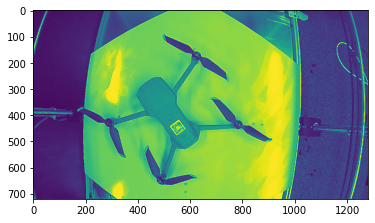

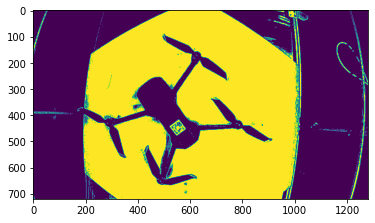

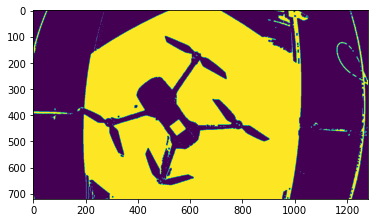

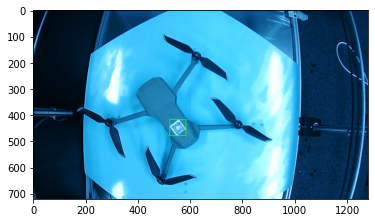

In [25]:
import numpy as np
oi = "../imgs/above_imgs/2020-09-12_1923.jpg"
img_gray = cv2.imread(oi, cv2.IMREAD_GRAYSCALE) 
img = cv2.imread(oi) 
img2 = cv2.imread(oi) 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)
plt.imshow(sharpen)
plt.show()

thresh = cv2.threshold(sharpen,160,255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)
plt.show()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
plt.imshow(close)
plt.show()

image_number = 0
found_square = None 
for c in cnts:
    area = cv2.contourArea(c)
    if area>1000 and area < 2000:
        found_square = c
        x,y,w,h = cv2.boundingRect(c)
        ROI = img[y:y+h, x:x+h]
        cv2.rectangle(img2, (x, y), (x + w, y + h), (36,255,12), 2)
        image_number += 1

plt.imshow(img2)
plt.show()

In [37]:
arr = np.array(found_square.squeeze(1))

In [38]:
arr.T

array([[556, 555, 553, 553, 552, 551, 551, 550, 549, 548, 547, 547, 546,
        545, 544, 544, 543, 542, 539, 538, 536, 535, 532, 531, 531, 530,
        529, 528, 527, 526, 525, 523, 523, 522, 522, 523, 523, 527, 527,
        530, 530, 533, 533, 538, 538, 539, 539, 544, 544, 548, 550, 551,
        552, 553, 554, 557, 558, 562, 563, 565, 566, 566, 567, 569, 572,
        573, 576, 577, 580, 581, 582, 582, 583, 583, 582, 582, 580, 580,
        576, 576, 573, 573, 569, 569, 567, 567, 564, 564, 561, 561, 560,
        559, 559, 558, 557],
       [417, 418, 418, 419, 420, 420, 421, 422, 422, 423, 423, 424, 425,
        424, 425, 426, 427, 427, 430, 430, 432, 432, 435, 435, 436, 437,
        437, 438, 438, 439, 439, 441, 442, 443, 444, 445, 446, 450, 451,
        454, 455, 458, 459, 464, 465, 466, 467, 472, 473, 477, 477, 476,
        476, 475, 475, 472, 472, 468, 468, 466, 466, 465, 464, 464, 461,
        461, 458, 458, 455, 455, 454, 453, 452, 451, 450, 449, 447, 446,
        442, 441, 438,

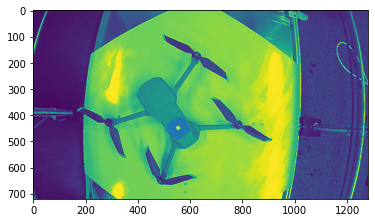

In [39]:
plt.scatter(arr.T[0], arr.T[1])
plt.imshow(sharpen)
plt.show()